In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



ËÆÄÂèñCSV

In [97]:
train_df = pd.read_csv("HW2_hr-analytics_train.csv")
test_df = pd.read_csv("HW2_hr-analytics_test.csv")
train_df.head(4)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.41             0.50               2                   153   
1                0.92             0.85               5                   259   
2                0.89             1.00               5                   224   
3                0.45             0.54               2                   135   

   time_spend_company  Work_accident  promotion_last_5years  sales salary  \
0                   3              0                      0  sales    low   
1                   5              0                      0  sales    low   
2                   5              0                      0  sales    low   
3                   3              0                      0  sales    low   

   left  
0     1  
1     1  
2     1  
3     1

In [98]:
test_df.head(4)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.96             0.60               3                   160   
1                0.40             0.53               2                   155   
2                0.48             0.93               3                   219   
3                0.10             0.77               6                   265   

   time_spend_company  Work_accident  promotion_last_5years      sales  salary  
0                  10              0                      0    support  medium  
1                   3              0                      0         IT    high  
2                   6              0                      0  technical     low  
3                   4              0                      0      sales     low

Â∞áÊï∏Â≠óÊ¨Ñ‰ΩçÁöÑÁº∫Â§±ÂÄºËÆäÊàêNaN
Á∂ìÈÅéÊ™¢Êü•ÔºåÁôºÁèæÊ≤íÊúâÁº∫Â§±ÂÄº

In [99]:
nan_col = train_df.isna().sum()  #.isna()ÊúÉÂõûÂÇ≥Ëàátrain.dfÁõ∏ÂêåÂ§ßÂ∞èÁöÑdataframÔºåËã•ÊòØÊúâÁº∫Â§±Áõ¥ÔºåÂ∞±ÊúÉÂõûÂÇ≥True
#.sum Â∞±ÊòØÂ∞çÊØèÂÄãcolumnÁöÑTrueÊï∏ÁõÆÊ±ÇÂíå
nan_coltest = test_df.isna().sum()

#‰∏ãÈù¢ÂÖ©ÂÄãÊñπÊ≥ïÂÆåÂÖ®‰∏ÄÊ®£ÔºåÂèØ‰ª•ÁúãÂá∫Âì™ÂÄãcolumnÊúâÁº∫Â§±ÂÄº
nan_isnull = train_df.isnull().any()
nan_isna = train_df.isna().any(axis = 0)  

print(nan_col)


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64


Â∞áÈùûÊï∏Â≠óÈ°ûÂûãÈÄ≤Ë°åÁ∑®Á¢º(Ê©üÂô®Â≠∏ÁøíÊ®°ÂûãÈÄöÂ∏∏Âè™ËÉΩËôïÁêÜÊï∏Â≠ó„ÄÇÂõ†Ê≠§ÔºåÈúÄË¶ÅÂ∞áÈùûÊï∏Â≠óÁöÑË≥áÊñôËΩâÊèõÊàêÊï∏Â≠óÔºåÊâçËÉΩËÆìÊ®°ÂûãÂ≠∏Áøí„ÄÇ)

#### ÈÅ∏ÊìáÈÅ©Áï∂ÁöÑÁ∑®Á¢ºÊñπÂºèÔºö

È°ûÂà•ÁÑ°È´ò‰ΩéÈóú‰øÇÔºö‰ΩøÁî® One-Hot Encoding„ÄÇ‰ΩÜË¶ÅÂ∞èÂøÉË≥áÊñôÈáèÂ§ßÊúÉÊúâCurse of dimensionality


È°ûÂà•ÊúâÈ´ò‰ΩéÈ†ÜÂ∫è‰πãÂàÜÔºöOrdinal Encoding

e.g. 
È´ò‰∏≠ --> 1
Â≠∏Â£´ --> 2
Á¢©Â£´ --> 3
ÂçöÂ£´ --> 4

È°ûÂà•ËàáÁõÆÊ®ôËÆäÊï∏ÊúâÂº∑Áõ∏ÈóúÊÄßÔºöTarget EncodingÔºåË∑üÊìöÁµêÊûú‰æÜÈÄ≤Ë°åencpde„ÄÇ‰ΩÜÈúÄÊ≥®ÊÑèË≥áÊñôÊ¥©Êºè„ÄÇ

In [100]:
sales_class = train_df['sales'].unique()
salary_class = train_df['salary'].unique()

print("unique classes in sales:",sales_class)
print('\n')
print("unuque classes in salary:",salary_class)

unique classes in sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


unuque classes in salary: ['low' 'medium' 'high']


Á∂ìÈÅé‰∏äÈù¢ËßÄÂØüÂæåÔºåÁôºÁèæsalesË≥áÊñôÁÑ°Áõ∏ÈóúÊÄßÔºåÊâÄ‰ª•‰ΩøÁî® one hot encoding

salary Ë≥áÊñôÊúâÁõ∏ÈóúÊÄßÔºåÊâÄ‰ª•‰ΩøÁî®label encoding

In [101]:
## one hot encoding
sales_encoded = pd.get_dummies(train_df['sales'],prefix='sales')
#for test data
sales_encodedts = pd.get_dummies(test_df['sales'],prefix='sales')


## label encoding
mapping = {'low' : 0,'medium' :1,'high' : 2}
train_df['salary_encoded' ] = train_df['salary'].map(mapping)
test_df['salary_encoded'] = test_df['salary'].map(mapping)


Â∞áencodingÁµêÊùüÁöÑË≥áÊñôÂØ´ÂõûÊñ∞ÁöÑcsv

In [102]:
train_df = pd.concat([train_df,sales_encoded],axis = 1)#Â∞áone hot encodingÁöÑÁµêÊûúÊï¥ÂêàÈÄ≤Âéªtrain_df
test_df = pd.concat([test_df,sales_encodedts],axis = 1)#Â∞áone hot encodingÁöÑÁµêÊûúÊï¥ÂêàÈÄ≤Âéªtrain_df



train_df = train_df.drop('sales',axis = 1)
train_df = train_df.drop('salary',axis = 1)


test_df = test_df.drop('sales',axis = 1)
test_df = test_df.drop('salary',axis = 1)

train_df.to_csv('encoded_train_data.csv',index= False)
test_df.to_csv('encoded_test_data.csv',index = 0)



## Á∂úÂêàË™øÊï¥
1. Â∞çaverage_montly_hoursÈÄ≤Ë°åÊ®ôÊ∫ñÂåñ(Âõ†ÁÇ∫Êï∏ÂÄºËºÉÂ§ßÔºåÁØÑÂúçÂæû100~300)

2. Â∞çlast_evaluation ‰ª•Âèä number projectcÈÄ≤Ë°åÂàÜÁÆ±ÔºåÂàÜÊàê„Äå‰Ωé„Äç„ÄÅ„Äå‰∏≠„Äç„ÄÅ„ÄåÈ´ò„Äç‰∏âÂÄãÈ°ûÂà•„ÄÇ

3. ÂâµÈÄ†Êñ∞ÁâπÂæµ efficiencyÔºåÁµêÂêà average_montly_hours Âíå time_spend_company ÔºåË°®Á§∫Âì°Â∑•ÁöÑ„ÄåÂ∑•‰ΩúÊïàÁéá„Äç„ÄÇ

4. ÁßªÈô§promotion_last_5years


In [103]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("encoded_train_data.csv")
test_df = pd.read_csv("encoded_test_data.csv")

# Step 1: Normalize 'average_montly_hours'
scaler = StandardScaler()
df['average_montly_hours_normalized'] = scaler.fit_transform(df[['average_montly_hours']])
test_df['average_montly_hours_normalized'] = scaler.fit_transform(test_df[['average_montly_hours']])

# Step 2 :Binning 'last_evaluation'
df['last_evaluation_binned'] = pd.cut(df['last_evaluation'], bins=3, labels=['Low', 'Medium', 'High'])
test_df['last_evaluation_binned'] = pd.cut(test_df['last_evaluation'], bins=3, labels=['Low', 'Medium', 'High'])


# Bining 'number project'
df['number_project_binned'] = pd.cut(df['number_project'],bins = 3,labels = ['Low','Medium','High'])
test_df['number_project_binned'] = pd.cut(test_df['number_project'],bins = 3,labels = ['Low','Medium','High'])

# Step 3: Create a new feature 'efficiency'
df['efficiency'] = df['average_montly_hours'] / df['time_spend_company']
test_df['efficiency'] = test_df['average_montly_hours'] / test_df['time_spend_company']


# Drop original features that have been transformed or are redundant
df = df.drop(columns=['average_montly_hours', 'last_evaluation', 'number_project','promotion_last_5years'])
test_df = test_df.drop(columns=['average_montly_hours', 'last_evaluation', 'number_project','promotion_last_5years'])

# Convert categorical features to dummy variables (create binary columns for 'low', 'medium', 'high')
# ÊâÄ‰ª•ÈÄ≤Ë°åÂàÜÁÆ±ÁµêÊùüÂæåÊúÉËÆäÊàê categorical data ÔºåË¶ÅÊääÂÆÉËÆäÊàênumerical dataÊâçËÉΩÈÄÅÂÖ•regression model
df = pd.get_dummies(df, columns=['last_evaluation_binned', 'number_project_binned'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['last_evaluation_binned', 'number_project_binned'], drop_first=True)

df.to_csv('final_train_data.csv',index=0)
test_df.to_csv('final_test_data.csv',index=0)
print(df.dtypes)


satisfaction_level                 float64
time_spend_company                   int64
Work_accident                        int64
left                                 int64
salary_encoded                       int64
sales_IT                              bool
sales_RandD                           bool
sales_accounting                      bool
sales_hr                              bool
sales_management                      bool
sales_marketing                       bool
sales_product_mng                     bool
sales_sales                           bool
sales_support                         bool
sales_technical                       bool
average_montly_hours_normalized    float64
efficiency                         float64
last_evaluation_binned_Medium         bool
last_evaluation_binned_High           bool
number_project_binned_Medium          bool
number_project_binned_High            bool
dtype: object


In [104]:
print(test_df.dtypes)

satisfaction_level                 float64
time_spend_company                   int64
Work_accident                        int64
salary_encoded                       int64
sales_IT                              bool
sales_RandD                           bool
sales_accounting                      bool
sales_hr                              bool
sales_management                      bool
sales_marketing                       bool
sales_product_mng                     bool
sales_sales                           bool
sales_support                         bool
sales_technical                       bool
average_montly_hours_normalized    float64
efficiency                         float64
last_evaluation_binned_Medium         bool
last_evaluation_binned_High           bool
number_project_binned_Medium          bool
number_project_binned_High            bool
dtype: object


### Âª∫Á´ãLogistic Regression Ê®°ÂûãÈÄ≤Ë°åË®ìÁ∑¥„ÄÇ(ÁÇ∫‰∫ÜÊñπ‰æøÁ≠âÁ≠âÊØîËºÉ)
‰∏¶ÂëàÁèæÊ∑∑Ê∑ÜÁü©Èô£„ÄÇ

Model Accuracy: 0.87
confusion matrix:
 [[1420   98]
 [ 154  328]]
AUC score: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1518
           1       0.77      0.68      0.72       482

    accuracy                           0.87      2000
   macro avg       0.84      0.81      0.82      2000
weighted avg       0.87      0.87      0.87      2000


Feature Importance:
                             Feature  Importance
14  average_montly_hours_normalized    3.457136
1                time_spend_company   -2.664855
16    last_evaluation_binned_Medium   -2.580812
0                satisfaction_level   -2.343813
2                     Work_accident   -1.540619
5                       sales_RandD   -0.699255
18     number_project_binned_Medium   -0.635926
3                    salary_encoded   -0.628152
17      last_evaluation_binned_High   -0.519601
7                          sales_hr    0.270807
15               

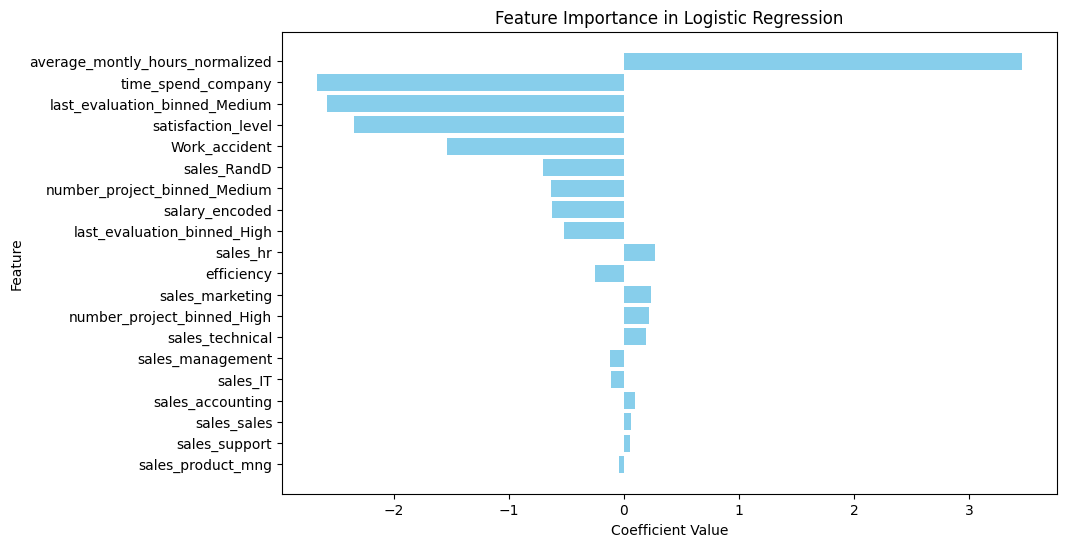

In [105]:
from sklearn.metrics import roc_auc_score

df = pd.read_csv('final_train_data.csv')


# Define feature columns and target
X = df.drop(columns=['left'])  # Assuming 'left' is the target variable
y = df['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test,y_pred)
print(f"confusion matrix:\n {conf_matrix}")

# Make predictions and calculate AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC score: {auc_score:.2f}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# ÁâπÂæµÈáçË¶ÅÊÄßÂàÜÊûêÔºà‰øÇÊï∏Ôºâ
feature_importance = model.coef_[0]  # ÈÇèËºØËø¥Ê≠∏ÁöÑ‰øÇÊï∏
features = X.columns

# Êï¥ÁêÜ‰∏¶ÊéíÂ∫èÁâπÂæµÈáçË¶ÅÊÄß
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df['Absolute Importance'] = np.abs(importance_df['Importance'])  # Áî®ÁµïÂ∞çÂÄº‰æÜÊéíÂ∫è
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

print("\nFeature Importance:\n", importance_df[['Feature', 'Importance']])

# Ë¶ñË¶∫ÂåñÁâπÂæµÈáçË¶ÅÊÄß
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

### dicition tree ÈÄ≤Ë°åË®ìÁ∑¥
ÂëàÁèæÊ∑∑Ê∑ÜÁü©Èô£„ÄÇ

In [106]:
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('final_train_data.csv')

#ÂàÜÈõ¢X‰ª•ÂèäY
x = df.drop('left',axis = 1)
y = df['left']

#ÂàÜÈõ¢Ê∏¨Ë©¶Ë≥áÊñô
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

y_pred = treemodel.predict(X_test)

#Ë©ï‰º∞accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")

#Âª∫Á´ãÊ∑∑Ê∑ÜÁü©Èô£
conf_matrix = confusion_matrix(y_test,y_pred)
print(f"confusion matrix:\n {conf_matrix}")


class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")




Accuracy:0.973
confusion matrix:
 [[1495   23]
 [  31  451]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1518
           1       0.95      0.94      0.94       482

    accuracy                           0.97      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.97      0.97      2000



### Âà©Áî®Ë®ìÁ∑¥ÂæåÁöÑÊ®°ÂûãÈ†êÊ∏¨Ê∏¨Ë©¶Ë≥áÊñôHW2_hr-analytics_test.csvÁöÑÈõ¢ËÅ∑ÊÉÖÊ≥Å


In [107]:
test_df = pd.read_csv("final_test_data.csv")
y_pred = treemodel.predict(test_df)

save_df = pd.DataFrame(y_pred,columns = ['left'])
print(save_df.head(5))

save_df.to_csv('HW2_hr-analytics_test_sol.csv',index =False)

   left
0     0
1     0
2     1
3     1
4     0


## Êé¢Ë®éËàádecision treeËàálogistic regressionÁöÑÈÅ©ÂêàÂ∫¶ÂèäÂéüÂõ†

### ÂÖàÁúãÁúãlogistic regression ÁöÑÂéüÁêÜ

logistic is a linear combination of the features

(e.g. x1 = satisfaction_level, x2 = time_spend_company)

z = w1x1 + w2x2 + ... + wnxn

w is weight to ve learned

z is the linear score for this input data(one row in the csv)

then we pass z through a sigmoid function,The output 

ùúé(ùëß)

represents the probability that the input data point belongs to the positive class(left = 1) 

so we make a prediction based on the ùúé(ùëß),if it >= 0.5 , we predeic left = 1

### ÂÜçÁúãÁúãdecision tree

it use different features(e.g. satisfaction_level,time_spend_company) as the trees nodes,

the prediction is down by split one data from root to leaf,based on the feature values



After all splits are made, each leaf node ends up with a group of data points that have similar characteristics.(e.g  satisfaction_level < 0.5  and time_spend_company > 3)

Each leaf node represents a final class label (like left = 1 or left = 0).

the label is determined by looking at the majority class in that leaf node during training.

### ÊØîËºÉ
1.  accuracy

    Decision Tree:99.95%

    Logistic Regression:87% ,     with a slightly lower performance on class 1 

            (recall of 68% for class 1)

2. confusion matrix

    Decision Tree: With only one false positive

    Logistic Regression: hard to classify class 1 (152 false negatives). 

### Êé¢Ë®é 

    a. decision tree ÊØîËºÉÈÅ©ÂêàÊçïÊçânon linearÁâπÊÄßÔºåÈÄèÈÅé‰∏çÂêåÁöÑfeature‰ª•Âèäthresholds‰æÜÂàÜÈ°ûÔºåËÄålogistic regressionÂè™Áî®‰∏ÄÊ¢ù‰∏ÄÊ¨°ÊñπÁöÑÁõ¥Á∑ö(or Âπ≥Èù¢)‰æÜÂçÄÂàÜÂÖ©ÂÄãÈ°ûÂà•ÔºåÂ∞çÊñºÈùûÁ∑öÊÄßÁöÑË≥áÊñôÂèØËÉΩËºÉÈõ£È†êÊ∏¨„ÄÇ
    
    b.decision treeÁµêÊûúÂæàÊºÇ‰∫ÆÔºå‰ΩÜÊòØÂèØËÉΩÂ∞éËá¥overfitting


    Ê†πÊìöË≥áÊñôÊú¨Ë∫´
    left = 0Ê®£Êú¨Êï∏Èáè (1518) ÈÅ†ÈÅ†Â§öÊñºleft = 1Ê®£Êú¨Êï∏Èáè (482)ÔºåÊâÄ‰ª•Ê®°ÂûãËºÉÈõ£ÂàÜËæ®left


### ÁµêË´ñ
    
    a. Â¶ÇÊûúÊÉ≥Ë¶ÅÁêÜËß£Ê®°ÂûãÔºölogistic regressionÂèØ‰ª•ÁúãÂà∞ÊØèÂÄãfeature Ë®ìÁ∑¥Âá∫ÁöÑweightÔºåËÉΩÂπ´Âä©ÊàëÂÄëÁêÜËß£Âì™‰∫õÁâπÂæµÊâçÊòØÈáçË¶ÅÁöÑÔºå‰ΩÜdecision tree‰πüÂèØ‰ª•‰ΩøÁî®Â•ó‰ª∂ÂÅöÂà∞ÈÄô‰∏ÄÈªû„ÄÇ

    b. Â¶ÇÊûúÊÉ≥Ë¶ÅÊèêÈ´òÊ≥õÂåñËÉΩÂäõÔºöÈõñÁÑ∂decition treeÁöÑÈ´òÊ∫ñÁ¢∫ÁéáÊõ¥ÂèØËÉΩoverfittingÔºå‰ΩÜÊòØÁ∂ìÈÅéÊ∏¨Ë©¶Ôºå‰∏çÂêåÁöÑtrain test splitÔºåÈÉΩËÉΩÈÅîÂà∞ÂæàÈ´òÁöÑÊ∫ñÁ¢∫Â∫¶„ÄÇ

    c. È°ûÂà•‰∏çÂπ≥Ë°°:ÂæûÁµêÊûú‰æÜÁúãÔºådecision treeËÉΩÂæàÂ•ΩÁöÑÈù¢Â∞çÈÄôÈ°ûÂïèÈ°åÔºåÂ¶ÇÊûúÊ≤íÊúâÂÅöÈ°çÂ§ñÁöÑË≥áÊñôÊì¥Â¢ûÔºåÈÅ∏Êìádecision treeÊàñË®±ËÉΩÊîπÂñÑË≥áÊñô‰∏çÂπ≥Ë°°ÁöÑÂïèÈ°å„ÄÇ

    d.ËøΩÊ±Çaccuracy:ÈÇ£Â∞±ÈÅ∏Êìádecision tree„ÄÇ


    Á∏ΩÈ´î‰æÜË™™ÔºåÊàëÊúÉÈÅ∏Êìá‰ΩøÁî®decision tree‰ΩúÁÇ∫Èõ¢ËÅ∑ÁéáÈ†êÊ∏¨ÁöÑÊ®°ÂûãÔºåÂõ†ÁÇ∫Á∂ìÈÅéÊ∏¨Ë©¶Ôºå‰∏çË´ñtrain test split Âæû0.1 Âà∞0.9Ôºådecision treeÈÉΩ‰øùÊåÅ98%‰ª•‰∏äÁöÑÈ´òÊ∫ñÁ¢∫Â∫¶ÔºåÂõ†Ê≠§ÂÖ∑ÊúâÂæàÂ•ΩÁöÑÊ≥õÂåñ„ÄÅaccuracyÔºåËôïÁêÜ‰∏çÂπ≥Ë°°Ë®ìÁ∑¥Ë≥áÊñôÁöÑËÉΩÂäõÔºåËÄå‰∏îÂõ†ÁÇ∫È°ûÂà•‰∏çÂ§öÔºå‰πüÂèØ‰ª•Âπ´Âä©Êü•ÁúãÂì™‰∫õÊâçÊòØÈáçË¶ÅÁöÑÁâπÂæµ„ÄÇ

## decision treeÁâπÂæµÈáçË¶ÅÊÄßÂàÜÊûê


Feature Importance:
                             Feature  Importance
0                satisfaction_level    0.406440
15                       efficiency    0.188327
1                time_spend_company    0.154407
18     number_project_binned_Medium    0.112365
14  average_montly_hours_normalized    0.051502
17      last_evaluation_binned_High    0.038163
16    last_evaluation_binned_Medium    0.026070
3                    salary_encoded    0.006011
13                  sales_technical    0.003448
2                     Work_accident    0.002448
19       number_project_binned_High    0.002388
12                    sales_support    0.002077
11                      sales_sales    0.001768
6                  sales_accounting    0.001032
4                          sales_IT    0.000832
8                  sales_management    0.000817
10                sales_product_mng    0.000661
7                          sales_hr    0.000634
9                   sales_marketing    0.000425
5                 

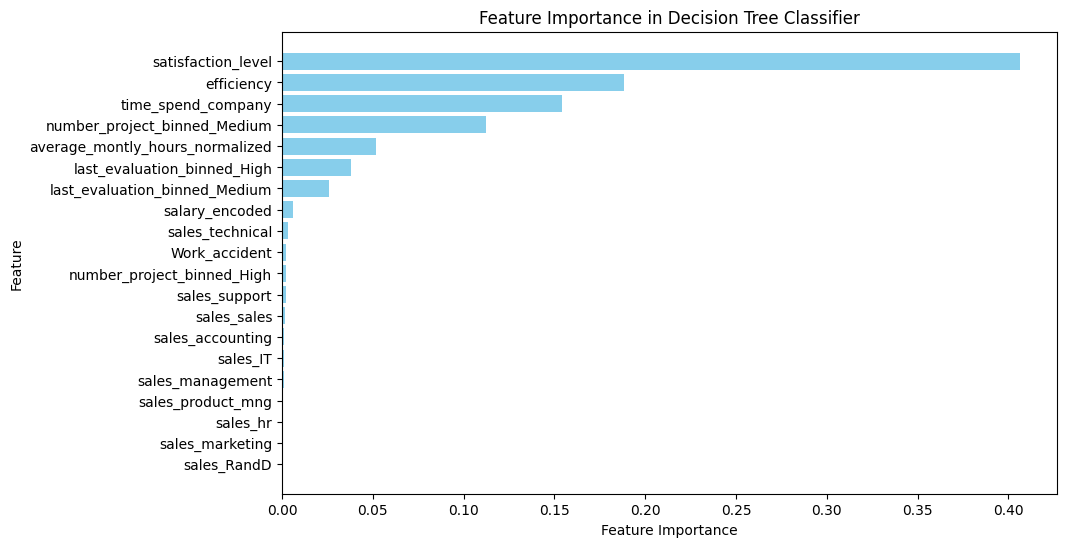

In [108]:
# ÁâπÂæµÈáçË¶ÅÊÄßÂàÜÊûê
feature_importances = treemodel.feature_importances_
features = x.columns

# Â∞áÁâπÂæµÈáçË¶ÅÊÄßÁµêÊûúÊï¥ÁêÜÁÇ∫ DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importance_df)

# Ë¶ñË¶∫ÂåñÁâπÂæµÈáçË¶ÅÊÄß
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Classifier")
plt.gca().invert_yaxis()
plt.show()


Ê†πÊìö‰πãÂâçÁöÑÁµêÊûúÔºåsatisfaction_level Âíå efficiency ÊòØÁõ∏Â∞çÈáçË¶ÅÁöÑÁâπÂæµ„ÄÇ

### Âü∫ÊñºÈÄôÂÖ©ÂÄãÁâπÂæµË®ìÁ∑¥‰∏ÄÂÄãÊ®°Âûã

‰∏¶Áπ™Ë£ΩROC„ÄÅÊ±∫Á≠ñÂúñ 

AUC Score: 0.95


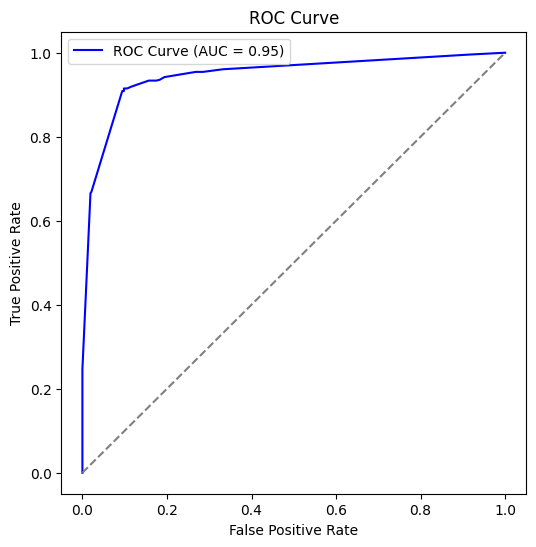

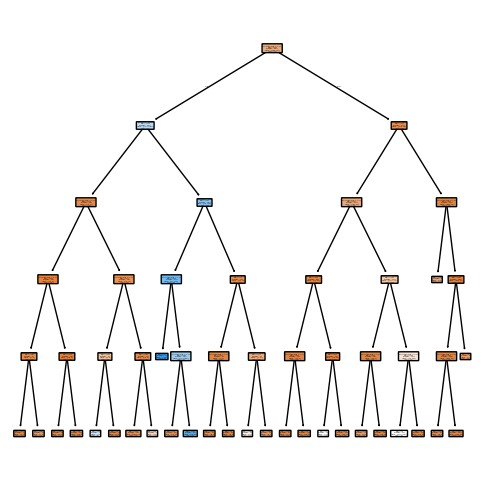

In [110]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('final_train_data.csv')

# Select the two most important features
X = df[['satisfaction_level', 'efficiency']]
y = df['left']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree model with depth limitation and pruning parameters
tmodel = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tmodel.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = tmodel.predict_proba(X_test)[:, 1]

# Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot simplified decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=100)
plot_tree(
    tmodel,
    feature_names=['satisfaction_level', 'efficiency'],
    class_names=['stay', 'left'],
    filled=True,
    rounded=True
)
plt.show()
